5216
Accuracy: 0.9624233128834356
Prediction is: PNEUMONIA


<function matplotlib.pyplot.show(close=None, block=None)>

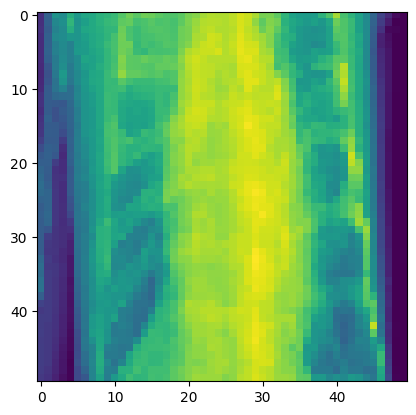

In [22]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random

dir = 'C:\\Users\\91996\\Desktop\\Hackathon\\ImageTraining\\chest_xray\\train'

data=[]

categories = ['PNEUMONIA', 'NORMAL']
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        x_ray_image=cv2.imread(imgpath,0)
        try:
            x_ray_image=cv2.resize(x_ray_image,(50,50))
            image = np.array(x_ray_image).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
print(len(data))
pick_in = open("data1.pickle",'wb')
pickle.dump(data,pick_in)
pick_in.close()

pick_in = open("data1.pickle",'rb')
data=pickle.load(pick_in)
pick_in.close()

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import random

random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)
    
xtrain, xtest, ytrain, ytest= train_test_split(features, labels,test_size=0.25)
model = SVC(C=1, kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

pick= open('xraymodel.sav','wb')
pickle.dump(model,pick)
pick.close()
predition =model.predict(xtest)

accuracy = model.score(xtest,ytest)

categories = ['PNEUMONIA', 'NORMAL']

print("Accuracy:", accuracy)

print("Prediction is:",categories[predition[0]])

xray=xtest[0].reshape(50,50)

plt.imshow(xray)
plt.show



In [21]:
pick_in = open("data1.pickle",'rb')
data=pickle.load(pick_in)
pick_in.close()



Accuracy: 0.9693251533742331
Prediction is: PNEUMONIA


<function matplotlib.pyplot.show(close=None, block=None)>

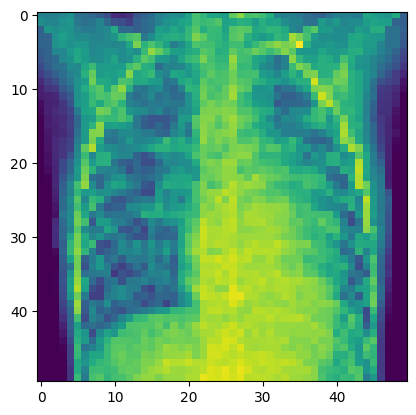

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import random

random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)
    
xtrain, xtest, ytrain, ytest= train_test_split(features, labels,test_size=0.25)
model = SVC(C=1, kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

pick= open('xraymodel.sav','wb')
pickle.dump(model,pick)
pick.close()
predition =model.predict(xtest)


categories = ['PNEUMONIA', 'NORMAL']

print("Accuracy:", accuracy)

print("Prediction is:",categories[predition[0]])

xray=xtest[0].reshape(50,50)

plt.imshow(xray)
plt.show

Accuracy: 0.9624233128834356
Prediction is: NORMAL


<function matplotlib.pyplot.show(close=None, block=None)>

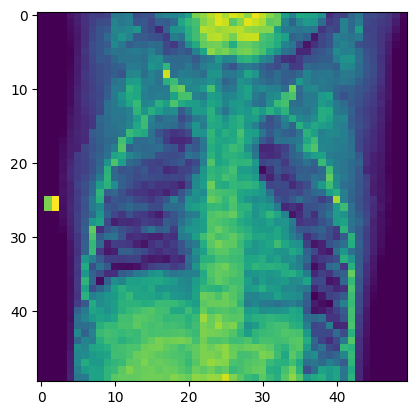

In [26]:
pick= open('xraymodel.sav','rb')
modell=pickle.load(pick)
pick.close()

test_image = cv2.imread("C:/Users/91996/Desktop/Hackathon/ImageTraining/chest_xray/train/NORMAL/IM-0239-0001.jpeg", 0)
test_image = cv2.resize(test_image, (50, 50))
test_image = np.array(test_image).flatten().reshape(1, -1)

predition =modell.predict(test_image)


categories = ['PNEUMONIA', 'NORMAL']

print("Accuracy:", accuracy)

print("Prediction is:",categories[predition[0]])

xray=test_image[0].reshape(50,50)

plt.imshow(xray)
plt.show